<a href="https://colab.research.google.com/github/ZilongJi/NEUR0016Lectures/blob/main/HPCSpatialRepresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1, Let's download the dataset from the GitHub repo

In [32]:
!wget -q -O mousedata.npz https://raw.githubusercontent.com/ZilongJi/NEUR0016Lectures/main/mousedata.npz
!wget -q -O utils.py       https://raw.githubusercontent.com/ZilongJi/NEUR0016Lectures/main/utils.py


### 2, Let's plot some receptive fields of place cells!

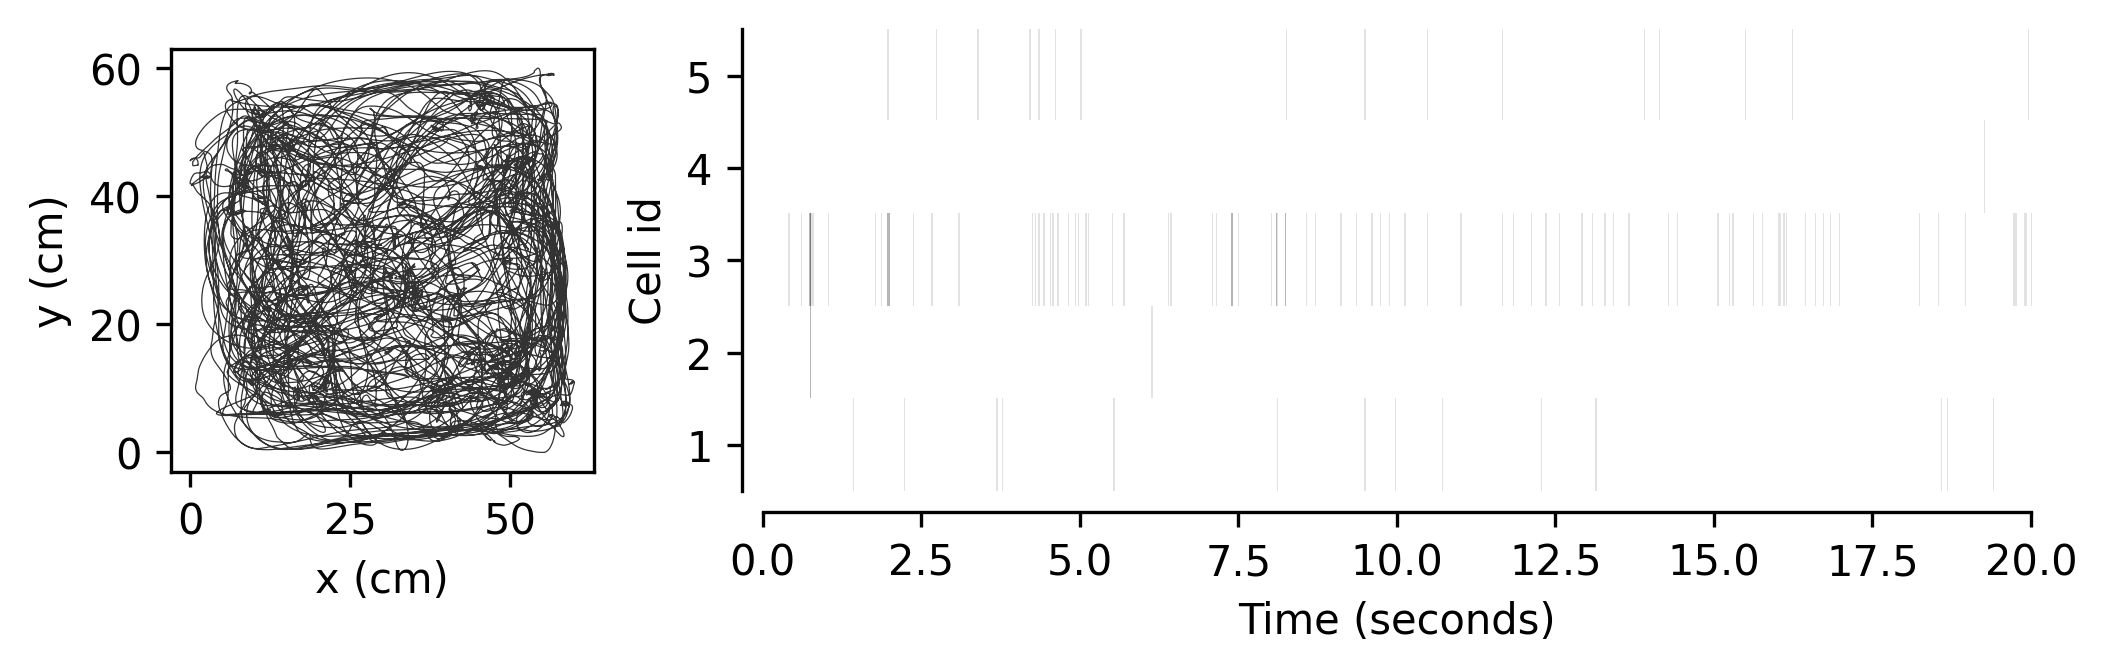

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

#load the data
data = np.load('mousedata.npz')
SpikeArray = data["SpikeArray"]
position = data["position"]
timestamps = data["timestamps"]
samplerate = data["samplerate"]

#
#Plot trajectory and spikes of all cells
#init a figure using gridspec with 2 columns and 1 row
fig = plt.figure(figsize=(8,2), dpi=300)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3])
labelsize = 10
ticksize = 8

#visulized the position using subplot 1
ax0 = plt.subplot(gs[0])
ax0.plot(position[:,0], position[:,1], 'k', alpha=0.8, linewidth=0.3)
ax0.set_xlabel('x (cm)', fontsize=labelsize)
ax0.set_ylabel('y (cm)', fontsize=labelsize)
#set equal axis
ax0.set_aspect('equal')

#visulized the spike raster plot using imshow in subplot 2
ax1 = plt.subplot(gs[1])

# Randomly select 5 cell indices
num_cells_to_plot = 5
random_cell_indices = np.random.choice(SpikeArray.shape[0], size=num_cells_to_plot, replace=False)
selected_spike_array = SpikeArray[random_cell_indices, :]

ax1.imshow(selected_spike_array, aspect='auto', cmap='Greys', interpolation='none', extent=[0, timestamps[-1], 1, num_cells_to_plot+1])

ax1.set_xlabel('Time (seconds)', fontsize=labelsize)
ax1.set_ylabel('Cell id', fontsize=labelsize)
ax1.set_xlim([0, timestamps[50*20]]) # Set the upper limit to the 1000th timestamp
#set y tick labels
ax1.set_yticks(np.arange(1, num_cells_to_plot+1)+0.5)
ax1.set_yticklabels(np.arange(1, num_cells_to_plot+1))
sns.despine(ax=ax1, offset=5)


### 3, overlay spikes on the treajctory

NameError: name 'gaussian_filter' is not defined

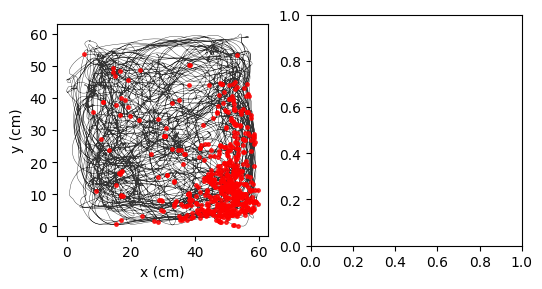

In [31]:
# Create a new figure and axes
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

ax = axs[0]
cell_idx = 15
spike_positions = position[SpikeArray[cell_idx, :].nonzero()[0], :]

# Plot the trajectory
ax.plot(position[:, 0], position[:, 1], 'k', alpha=0.8, linewidth=0.3)

# Plot the spike positions for cell 15
ax.plot(spike_positions[:, 0], spike_positions[:, 1], 'r.', markersize=5, alpha=0.8)

# Set labels and aspect ratio
ax.set_xlabel('x (cm)', fontsize=labelsize)
ax.set_ylabel('y (cm)', fontsize=labelsize)
ax.set_aspect('equal')

ax = axs[1]
spikes = SpikeArray[cell_idx,:]
import utils
rate_map = utils.compute_firing_rate_map(position, spikes, timestamps)
